# Лабораторная работа №1
## Выполнил : Пелагеев Даниил Иванович Б9122-01.03.02мкт
### Пингвины

In [38]:
# Решил уйти от numpy, потому что пингвины лежат в seaborn и уже проще там сделать
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
# Загрузка набора данных
data = sns.load_dataset('penguins')

# Просмотр первых 10 строк набора данных
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [40]:
# Получение информации о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Описание признаков:
- species (object): Вид пингвина (Adelie, Chinstrap, Gentoo).
- island (object): Остров обитания (Biscoe, Dream, Torgersen).
- bill_length_mm (float64): Длина клюва в миллиметрах.
- bill_depth_mm (float64): Глубина клюва в миллиметрах.
- flipper_length_mm (float64): Длина плавника в миллиметрах.
- body_mass_g (float64): Масса тела в граммах.
- sex (object): Пол пингвина (Male, Female).

In [41]:
num_rows, num_columns = data.shape
print(f"Количество наблюдений: {num_rows}")
print(f"Количество признаков: {num_columns}")

Количество наблюдений: 344
Количество признаков: 7


In [42]:
# Подсчет пропущенных значений в каждом признаке
missing_values = data.isnull().sum()
print("Количество пропущенных значений в каждом признаке:")
missing_values

Количество пропущенных значений в каждом признаке:


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Как я понял из пар по бигдате на R, nan значения нужно почистить, но здесь я не уверен, что нужно чистить, но на всякий случай почистим

In [43]:
# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

# Повторная проверка на пропущенные значения
missing_values = data.isnull().sum()
print("Пропущенные значения:\n", missing_values)

In [44]:
# Список числовых признаков
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Вычисление статистических показателей
stats = data[numeric_features].describe()
stats

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


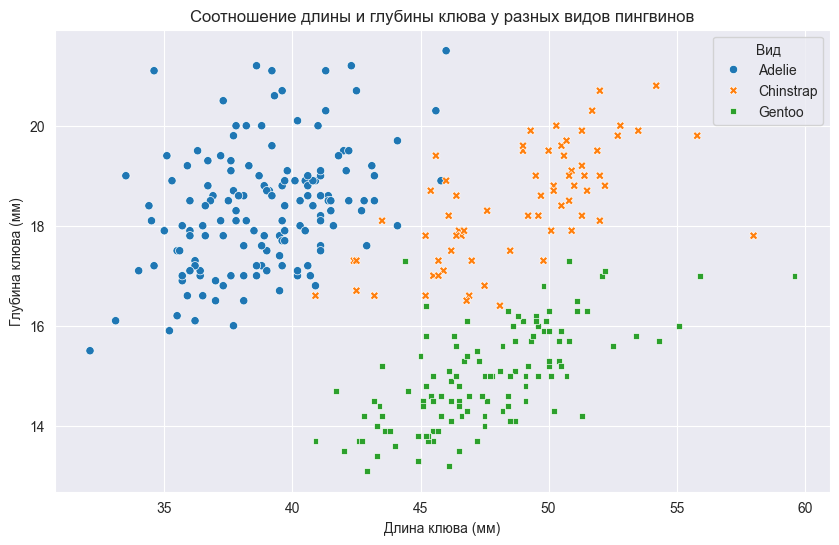

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species')
plt.title('Соотношение длины и глубины клюва у разных видов пингвинов')
plt.xlabel('Длина клюва (мм)')
plt.ylabel('Глубина клюва (мм)')
plt.legend(title='Вид')
plt.show()


Здесь мы решили выбрать отображение взаимосвязи между длиной и глубиной клюва пингвинов, как позже увидим это самые лучшие признаки для кластеризации

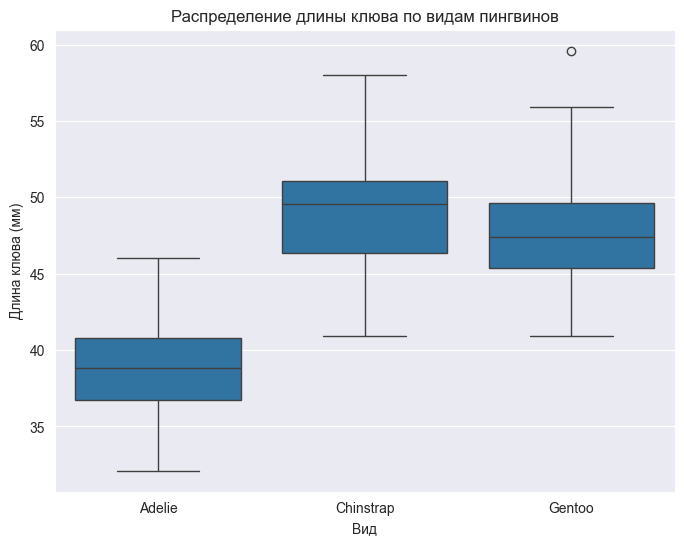

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title('Распределение длины клюва по видам пингвинов')
plt.xlabel('Вид')
plt.ylabel('Длина клюва (мм)')
plt.show()

По этому графику можно отделить Adelie, потому что у них самый маленький клюв

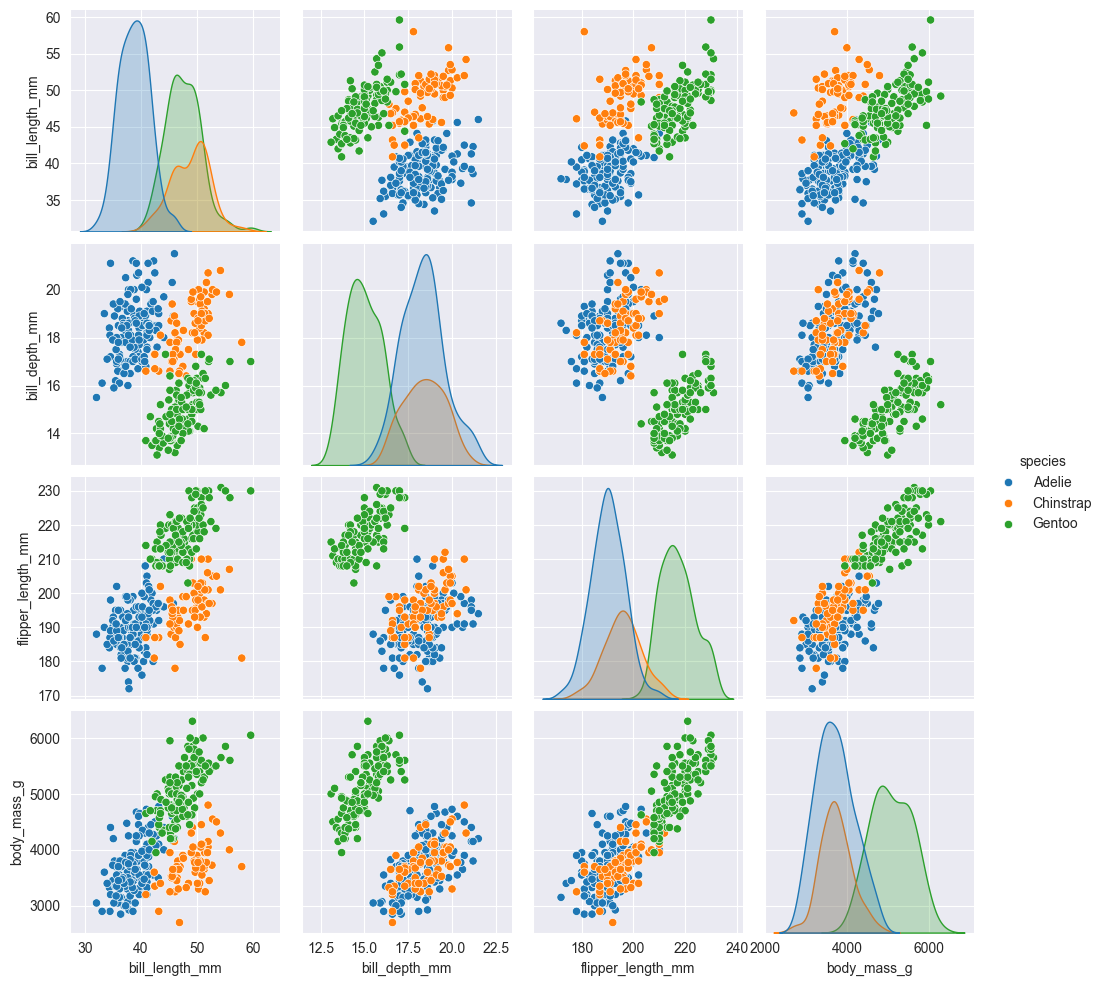

In [47]:
sns.pairplot(data.dropna(), hue='species', vars=numeric_features)
plt.show()

Куча парных график для нахождения идеальных признаков кластеризации

# Вопросы, которые были заданы в лабе
    1) Пятый столбец возвращает nan, потому что метод getfromtxt по умолчанию ставит dtype равный float
    2) Разница в том, что тип данных в data1 был определен автоматически, но пришлось utf-8 еще добавлять, чтобы не было ошибки, а в data2 мы сами определяем тип данных, указывая байтовость float и длину unicode.
    3)Сколько всего различных проекций можно построить для данного набора данных? Ответ: 6

![picture](pictures/kaggle_cat.jpeg)